# Name : Jeet Limbachiya

Task 2 : A task that specifically deal with the clustering algos of the Unsupervised Machine Learning.

The Unsupervised Machine Learning is the technique that doesn't has the specified target variable. We need to identify the clusters by making the clusters based on the similarity of the attribute.   

Step 1: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Reading the data

In [2]:
Iris_train = pd.read_csv('Iris.csv')
Iris_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Step 3: Understanding the data

In [3]:
Iris_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
Iris_train.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
Iris_train.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

Pivot table is the amazing feature of pandas that gives the compact and effective description of the data under one table.  

In [6]:
pd.pivot_table(data=Iris_train,index=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],columns=Iris_train['Species'])

Id  \
Species                                               Iris-setosa   
SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm               
4.3           3.0          1.1           0.1                 14.0   
4.4           2.9          1.4           0.2                  9.0   
              3.0          1.3           0.2                 39.0   
              3.2          1.3           0.2                 43.0   
4.5           2.3          1.3           0.3                 42.0   
...                                                           ...   
7.7           2.6          6.9           2.3                  NaN   
              2.8          6.7           2.0                  NaN   
              3.0          6.1           2.3                  NaN   
              3.8          6.7           2.2                  NaN   
7.9           3.8          6.4           2.0                  NaN   

                                                                       \
Species                                               Iris-versicolor   
SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm                   
4.3           3.0          1.1           0.1                      NaN   
4.4           2.9          1.4           0.2                      NaN   
              3.0          1.3           0.2                      NaN   
              3.2          1.3           0.2                      NaN   
4.5           2.3          1.3           0.3                      NaN   
...                                                               ...   
7.7           2.6          6.9           2.3                      NaN   
              2.8          6.7           2.0                      NaN   
              3.0          6.1           2.3                      NaN   
              3.8          6.7           2.2                      NaN   
7.9           3.8          6.4           2.0                      NaN   

                                                                      
Species                                               Iris-virginica  
SepalLengthCm SepalWidthCm PetalLengthCm PetalWidthCm                 
4.3           3.0          1.1           0.1                     NaN  
4.4           2.9          1.4           0.2                     NaN  
              3.0          1.3           0.2                     NaN  
              3.2          1.3           0.2                     NaN  
4.5           2.3          1.3           0.3                     NaN  
...                                                              ...  
7.7           2.6          6.9           2.3                   119.0  
              2.8          6.7           2.0                   123.0  
              3.0          6.1           2.3                   136.0  
              3.8          6.7           2.2                   118.0  
7.9           3.8          6.4           2.0                   132.0  

[147 rows x 3 columns]

The unsupervised machine learning technique does not have the dedicated target variable, but in this data we have 
the target variable namely species. So, we are going to drop that feature as we do not need it, we are going to form a cluster
of this species with the similarity of the other present attributes.

In [7]:
Iris_train.drop(['Id','Species'],axis=1,inplace=True)

In [8]:
Iris_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step 4: Visualizing the data

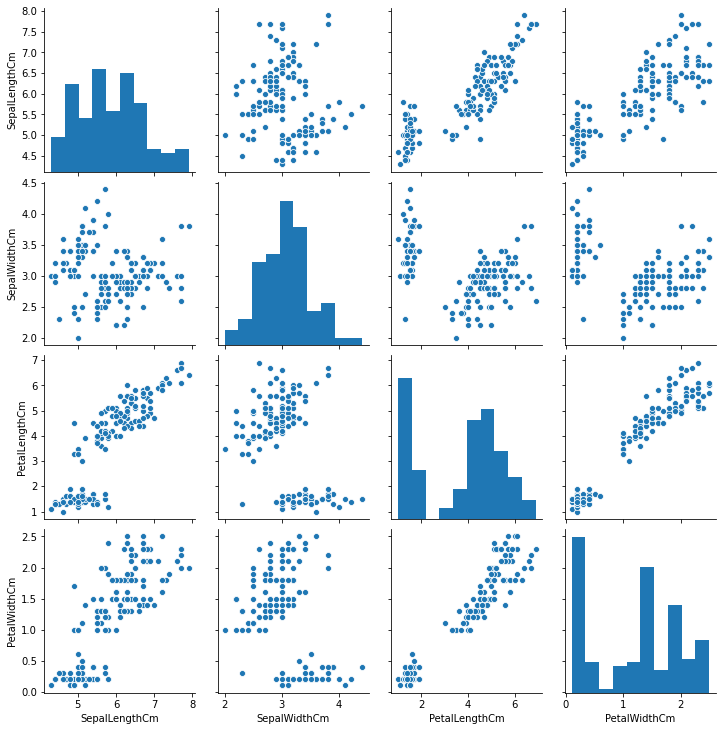

In [9]:
sns.pairplot(data=Iris_train,aspect=1.0,diag_kind='hist')

As we can see from the graph that, there are some groups that has some unique characteristics, that makes the bifurcation 
in a single chart. So, to make the clusters of the similar attributes who behaves  the same, we are using K-Means clustering.

K-Means clustering is the famous unsupervised machine learning technique that are predominantly used for making such clusters. It makes clusters using the nearest mean value belongs to that cluster. 

In [10]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

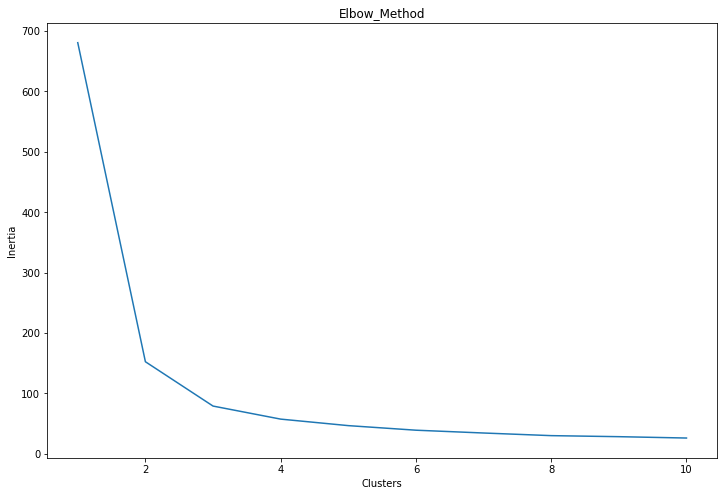

In [11]:
cluster = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(Iris_train)
    cluster.append(km.inertia_)  # inertia stores the info of no. of clusters
    
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=cluster,ax=ax)
ax.set_title('Elbow_Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

The above method is generally knows as elbow method which is used to get the idea of possible numbers of clusters availbale in the data. As we can see that there are 3 points that comes out from the curve. So, there are 3 clusters available in the data

In [13]:
Iris_train['Labels'] = km3.labels_

Here, the label stores the info. of the clusters(i.e, this point belongs to this cluster.)

In [31]:
Iris_train['Labels'].unique()

array([1, 0, 2], dtype=int64)

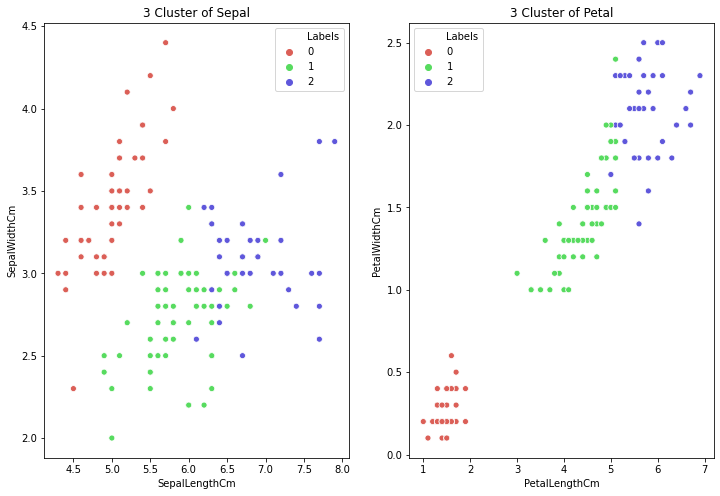

In [15]:
km3 = KMeans(n_clusters=3).fit(Iris_train)
plt.figure(figsize=(12,8))
plt.subplot(121)
sns.scatterplot(Iris_train['SepalLengthCm'],Iris_train['SepalWidthCm'],hue=Iris_train['Labels'],palette=sns.color_palette('hls',3))
plt.title('3 Cluster of Sepal')
plt.subplot(122)
sns.scatterplot(Iris_train['PetalLengthCm'],Iris_train['PetalWidthCm'],hue=Iris_train['Labels'],palette=sns.color_palette('hls',3))
plt.title('3 Cluster of Petal')
plt.show()

Here, the above two graphs are of the different columns but have the same species(labels), using hue parameter we have separated the clusters of three species of iris data.

Text(0, 0.5, 'Inertia')

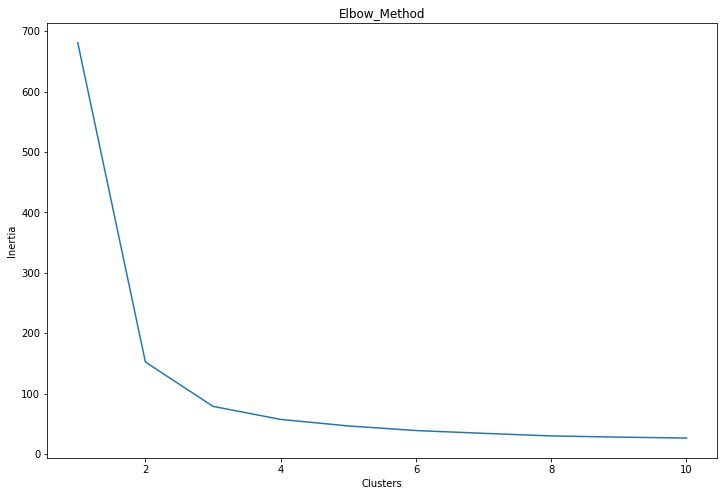

In [16]:
x = Iris_train.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
cluster = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    cluster.append(kmeans.inertia_)
    
fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(x=list(range(1,11)),y=cluster,ax=ax)
ax.set_title('Elbow_Method')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [17]:
kmeans = KMeans(n_clusters = 3)
km_pred = kmeans.fit_predict(x)

The below is the Clusters of the three species from the similar behaviour of the sepal length and sepal width

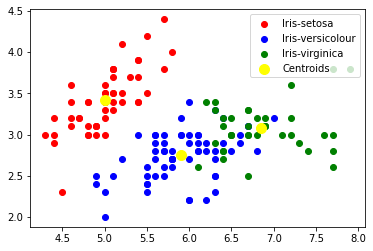

In [18]:
# Visualising the clusters - On the first two columns
plt.scatter(x[km_pred == 0, 0], x[km_pred == 0, 1], 
            c = 'red', label = 'Iris-setosa')
plt.scatter(x[km_pred == 1, 0], x[km_pred == 1, 1], 
            c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[km_pred == 2, 0], x[km_pred == 2, 1],
            c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper right')

The below is the Clusters of the three species from the similar behaviour of the petal length and petal width

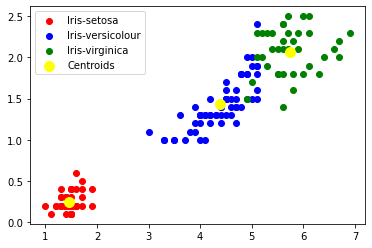

In [19]:
plt.scatter(x[km_pred == 0, 2], x[km_pred == 0, 3], 
            c = 'red', label = 'Iris-setosa')
plt.scatter(x[km_pred == 1, 2], x[km_pred == 1, 3], 
            c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[km_pred == 2, 2], x[km_pred == 2, 3],
            c = 'green', label = 'Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend(loc='upper left')

Step 5: Prediction

Checking the model by random input to the model 

In [20]:
Test = np.array([5.5,7.2,7.7,4.5]).reshape(1,-1)
kmeans.predict(Test)

array([2])

Now we have predicted and done visualization, we want to know that how this points is connected to the cluster. For this we use 
Agglomerative clustering

The very popular hierchical clustering technique is Agglomearative clustering technique, it is also a very known clustering technique for the unsupervised machine learning. It is given the linkage criteria and n_clusters parameter as necessary input to this model.

In [21]:
from sklearn.cluster import AgglomerativeClustering

As we see from the KMeans clustering technique that there are 3 clusters in the data. So, by specifying the n_clusters as 3 
and linkage as average we are going to build the another clustering technique. 
Linkage is the criteria that determines the distance between the two observation in the data.

In [22]:
agglom = AgglomerativeClustering(n_clusters=3,linkage='average')

In [23]:
agglom = agglom.fit(x)

In [24]:
Iris_train['Labels'] = agglom.labels_  # labels shows the clusters info as mentioned in the earlier technique

In [25]:
Iris_train['Labels'].unique()

array([1, 0, 2], dtype=int64)

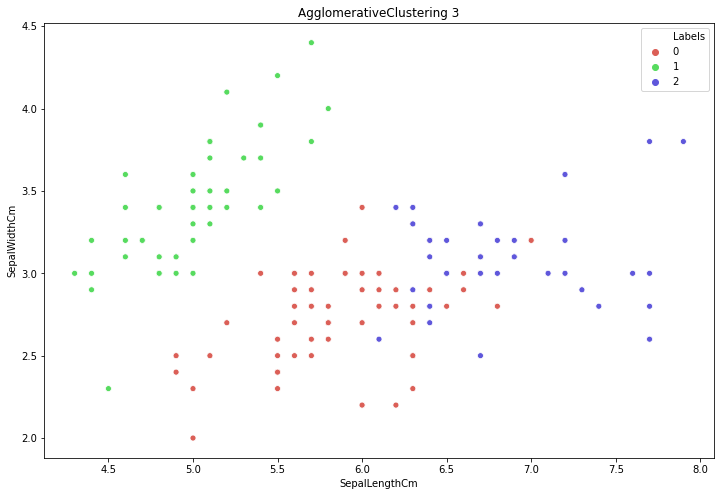

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(Iris_train['SepalLengthCm'],Iris_train['SepalWidthCm'],hue=Iris_train['Labels'],palette=sns.color_palette('hls',3))
plt.title('AgglomerativeClustering 3')
plt.show()

Here, that is from the above graph, we can see the clusters of the species based on the similar behaviour of the given two attributes.

As mentioned earlier this model works on the distance measurement(i.e, Linkage). So we need to calculate the distance 
from one point to other, so we do this by using distance matrix from the scipy library.

In [27]:
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

In [28]:
dist = distance_matrix(x,x)
print(dist)

[[0.         0.53851648 0.50990195 ... 4.45982062 4.65080638 4.14004831]
 [0.53851648 0.         0.3        ... 4.49888875 4.71805044 4.15331193]
 [0.50990195 0.3        0.         ... 4.66154481 4.84871117 4.29883705]
 ...
 [4.45982062 4.49888875 4.66154481 ... 0.         0.6164414  0.64031242]
 [4.65080638 4.71805044 4.84871117 ... 0.6164414  0.         0.76811457]
 [4.14004831 4.15331193 4.29883705 ... 0.64031242 0.76811457 0.        ]]


So, Now we have the distance matrix, we are going to use this matrix to show how this data points are connected with eachother. 

In [29]:
z = hierarchy.linkage(dist,'complete') # complete linkage of all the data points connected

<ipython-input-29-6f9bc3a9c543>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  z = hierarchy.linkage(dist,'complete') # complete linkage of all the data points connected


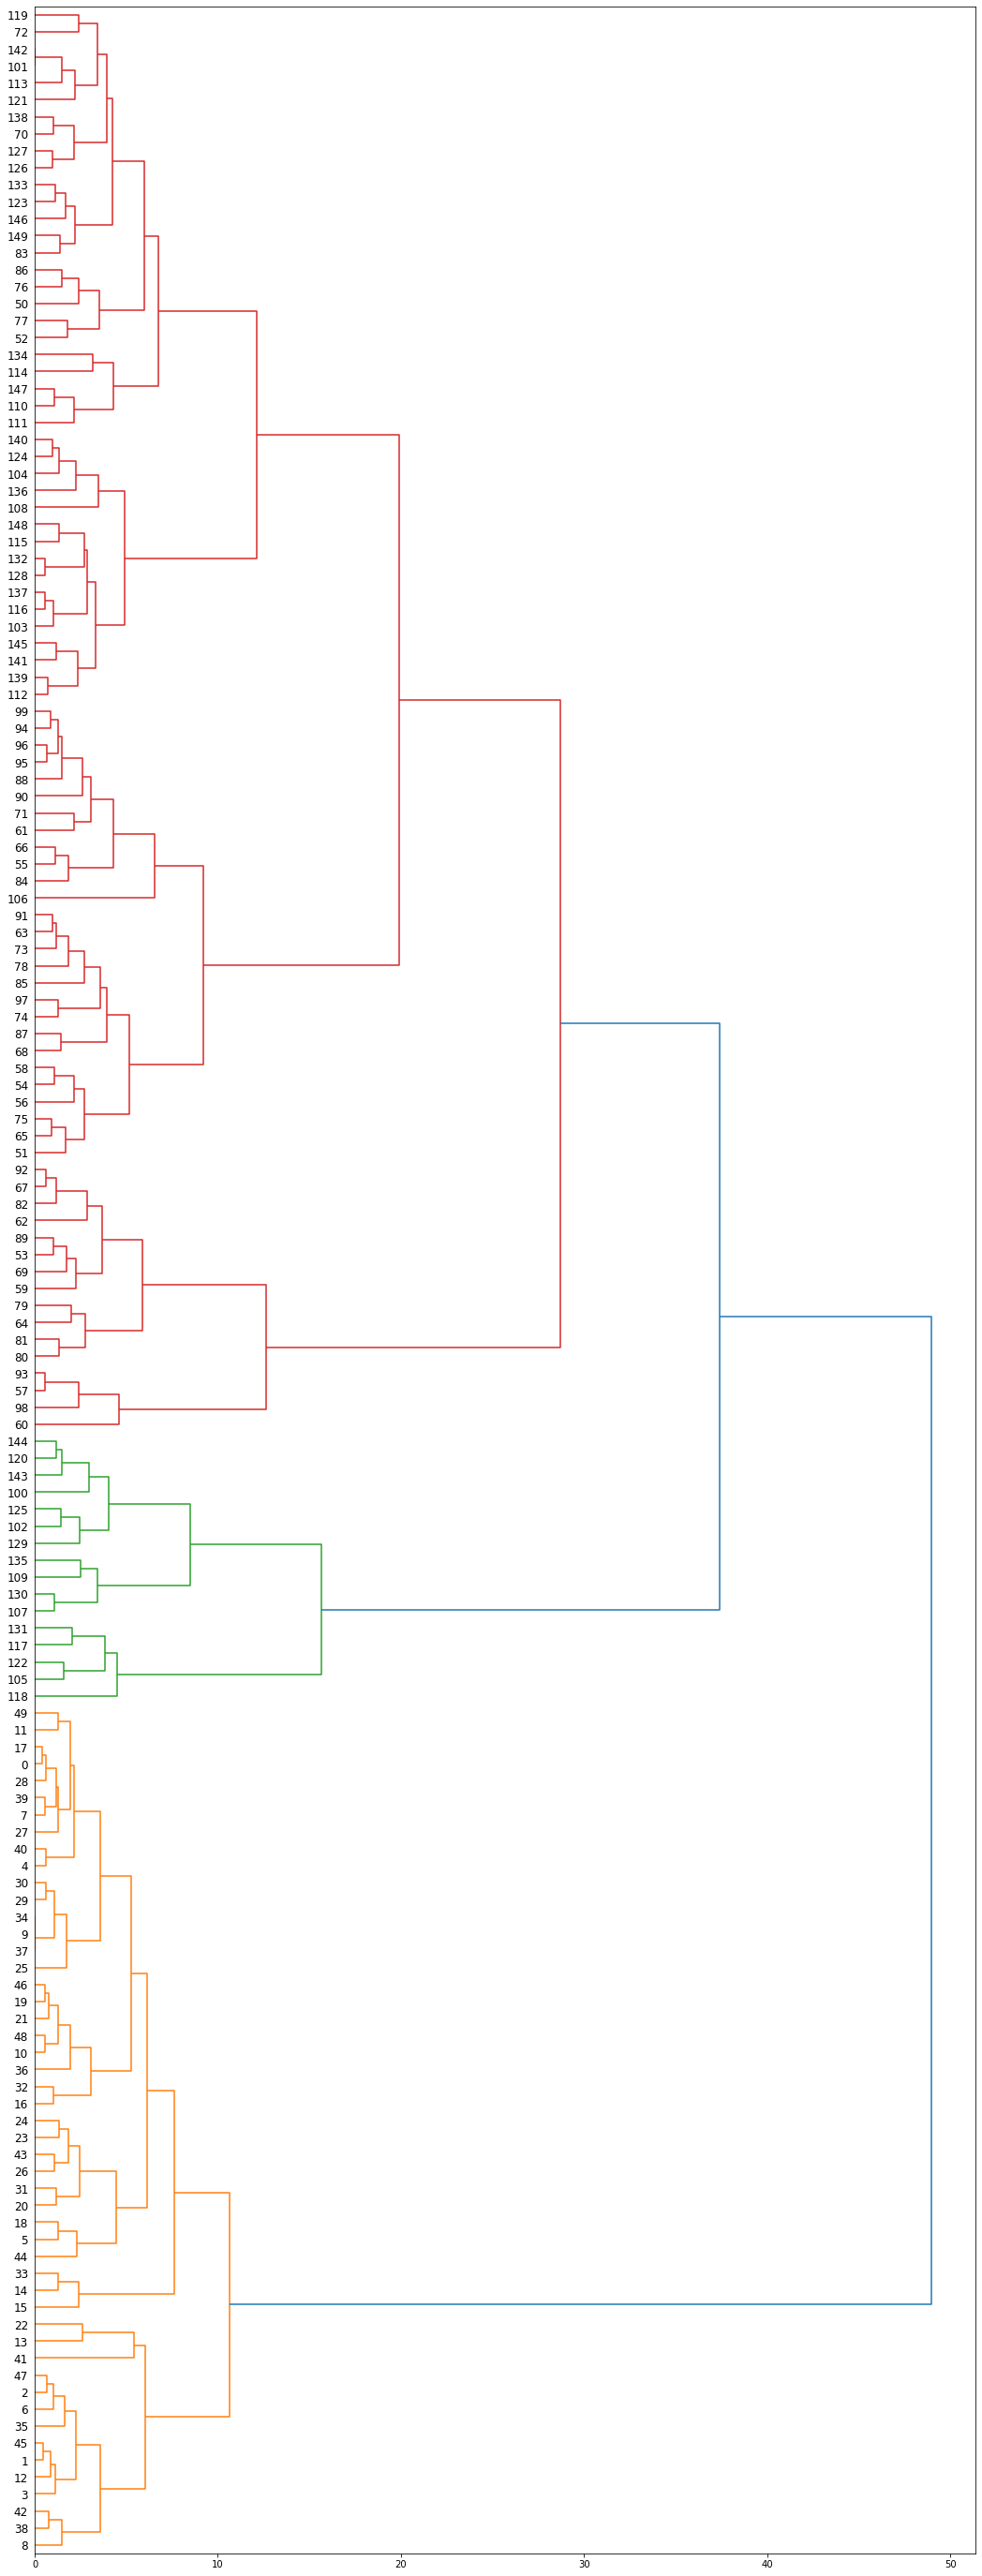

In [30]:
plt.figure(figsize=(18,50))
dendro = hierarchy.dendrogram(z,leaf_rotation=0,leaf_font_size=12,orientation='right')

The above chart shows the connection of each and every points to the clusters it belongs 